In [1]:
# 📦 Importar librerías necesarias
import pandas as pd
import numpy as np

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# 📄 Cargar todos los datasets
print("Cargando datasets...")

# Load the sales data (tab-delimited)
sales = pd.read_csv("datasets/sell-in.txt", sep="\t", dtype={"periodo": str})
print(f"✅ Sales data cargado: {sales.shape}")

# Load the stocks data (tab-delimited) 
stocks = pd.read_csv("datasets/tb_stocks.txt", sep="\t", dtype={"periodo": str})
print(f"✅ Stocks data cargado: {stocks.shape}")

# Load the product information data (tab-delimited)
product_info = pd.read_csv("datasets/tb_productos.txt", sep="\t")
print(f"✅ Product info cargado: {product_info.shape}")

# Carga productos a predecir
product_predict = pd.read_csv("datasets/product_id_apredecir201912.txt", sep="\t", header=0)
print(f"✅ Productos a predecir cargados: {product_predict.shape}")

print("\n🎯 Todos los datasets cargados exitosamente")

Cargando datasets...
✅ Sales data cargado: (2945818, 7)
✅ Stocks data cargado: (13691, 3)
✅ Product info cargado: (1251, 7)
✅ Productos a predecir cargados: (780, 1)

🎯 Todos los datasets cargados exitosamente
✅ Sales data cargado: (2945818, 7)
✅ Stocks data cargado: (13691, 3)
✅ Product info cargado: (1251, 7)
✅ Productos a predecir cargados: (780, 1)

🎯 Todos los datasets cargados exitosamente


In [3]:
# 🔍 Explorar estructura de los datos
print("EXPLORACIÓN DE DATOS")
print("="*50)

print("\n📊 SALES DATA:")
print(f"Columnas: {list(sales.columns)}")
print(f"Períodos únicos: {sales['periodo'].nunique()}")
print(f"Productos únicos: {sales['product_id'].nunique()}")
print("Primeras filas:")
print(sales.head())

print("\n📦 STOCKS DATA:")
print(f"Columnas: {list(stocks.columns)}")
print(f"Períodos únicos: {stocks['periodo'].nunique()}")
print(f"Productos únicos: {stocks['product_id'].nunique()}")
print("Primeras filas:")
print(stocks.head())

print("\n🏷️ PRODUCT INFO:")
print(f"Columnas: {list(product_info.columns)}")
print(f"Productos únicos: {product_info['product_id'].nunique()}")
print("Primeras filas:")
print(product_info.head())

print("\n🎯 PRODUCTOS A PREDECIR:")
print(f"Columnas: {list(product_predict.columns)}")
print(f"Total productos a predecir: {len(product_predict)}")
print("Primeras filas:")
print(product_predict.head())

EXPLORACIÓN DE DATOS

📊 SALES DATA:
Columnas: ['periodo', 'customer_id', 'product_id', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn']
Períodos únicos: 36
Productos únicos: 1233
Primeras filas:
  periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0  201701        10234       20524                      0                 2   
1  201701        10032       20524                      0                 1   
2  201701        10217       20524                      0                 1   
3  201701        10125       20524                      0                 1   
4  201701        10012       20524                      0                11   

   cust_request_tn       tn  
0          0.05300  0.05300  
1          0.13628  0.13628  
2          0.03028  0.03028  
3          0.02271  0.02271  
4          1.54452  1.54452  

📦 STOCKS DATA:
Columnas: ['periodo', 'product_id', 'stock_final']
Períodos únicos: 15
Productos únicos: 1095
Primeras filas:
  p

In [4]:
# 🔗 Verificar consistencia entre datasets
print("VERIFICACIÓN DE CONSISTENCIA")
print("="*50)

# Productos únicos en cada dataset
productos_sales = set(sales['product_id'].unique())
productos_stocks = set(stocks['product_id'].unique())
productos_info = set(product_info['product_id'].unique())

# Si product_predict tiene columna product_id
if 'product_id' in product_predict.columns:
    productos_predict = set(product_predict['product_id'].unique())
else:
    # Si la primera columna contiene los product_ids
    primera_columna = product_predict.columns[0]
    productos_predict = set(product_predict[primera_columna].unique())
    print(f"⚠️ Usando columna '{primera_columna}' como product_id")

print(f"📊 Productos en sales: {len(productos_sales)}")
print(f"📦 Productos en stocks: {len(productos_stocks)}")
print(f"🏷️ Productos en product_info: {len(productos_info)}")
print(f"🎯 Productos a predecir: {len(productos_predict)}")

# Verificar intersecciones
print(f"\n🔍 INTERSECCIONES:")
print(f"Sales ∩ Stocks: {len(productos_sales & productos_stocks)}")
print(f"Sales ∩ Product_info: {len(productos_sales & productos_info)}")
print(f"Sales ∩ Productos_predict: {len(productos_sales & productos_predict)}")
print(f"Stocks ∩ Productos_predict: {len(productos_stocks & productos_predict)}")
print(f"Product_info ∩ Productos_predict: {len(productos_info & productos_predict)}")

# Verificar rangos de fechas
print(f"\n📅 RANGOS DE FECHAS:")
print(f"Sales - períodos: {sales['periodo'].min()} a {sales['periodo'].max()}")
print(f"Stocks - períodos: {stocks['periodo'].min()} a {stocks['periodo'].max()}")

VERIFICACIÓN DE CONSISTENCIA
📊 Productos en sales: 1233
📦 Productos en stocks: 1095
🏷️ Productos en product_info: 1251
🎯 Productos a predecir: 780

🔍 INTERSECCIONES:
Sales ∩ Stocks: 1095
Sales ∩ Product_info: 1188
Sales ∩ Productos_predict: 780
Stocks ∩ Productos_predict: 779
Product_info ∩ Productos_predict: 780

📅 RANGOS DE FECHAS:
Sales - períodos: 201701 a 201912
Stocks - períodos: 201810 a 201912


In [5]:
# 📦 Instalar e importar LightGBM y librerías adicionales
# %pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("✅ LightGBM y librerías ML importadas correctamente")

✅ LightGBM y librerías ML importadas correctamente


In [6]:
# 🧹 Preparación de datos para el modelo LightGBM
print("PREPARACIÓN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO")
print("="*60)

# Convertir período a datetime para facilitar manipulación
sales['fecha'] = pd.to_datetime(sales['periodo'], format='%Y%m')
stocks['fecha'] = pd.to_datetime(stocks['periodo'], format='%Y%m')

# Filtrar solo productos que necesitamos predecir
if 'product_id' in product_predict.columns:
    productos_objetivo = product_predict['product_id'].tolist()
else:
    productos_objetivo = product_predict[product_predict.columns[0]].tolist()

print(f"🎯 Productos objetivo: {len(productos_objetivo)}")

# Filtrar sales y stocks para productos objetivo
sales_filtered = sales[sales['product_id'].isin(productos_objetivo)].copy()
stocks_filtered = stocks[stocks['product_id'].isin(productos_objetivo)].copy()

print(f"📊 Sales filtradas: {sales_filtered.shape}")
print(f"📦 Stocks filtradas: {stocks_filtered.shape}")

# AGREGACIÓN POR PRODUCTO: Sumar por producto y período (agregando todos los clientes)
sales_agg = sales_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'tn': 'sum',                    # Total toneladas por producto
    'customer_id': 'nunique',       # Número de clientes únicos
    'cust_request_qty': 'sum',      # Total cantidad solicitada
    'cust_request_tn': 'sum'        # Total toneladas solicitadas
}).reset_index()

# Renombrar columnas para claridad
sales_agg.rename(columns={
    'customer_id': 'num_customers',
    'cust_request_qty': 'total_request_qty', 
    'cust_request_tn': 'total_request_tn'
}, inplace=True)

print(f"📈 Sales agregadas por producto: {sales_agg.shape}")
print("Primeras filas de sales agregadas:")
print(sales_agg.head())

print(f"\n📊 Estadísticas por producto:")
print(f"  Promedio tn por producto-período: {sales_agg['tn'].mean():.2f}")
print(f"  Promedio clientes por producto-período: {sales_agg['num_customers'].mean():.2f}")
print(f"  Productos únicos: {sales_agg['product_id'].nunique()}")
print(f"  Períodos únicos: {sales_agg['periodo'].nunique()}")

PREPARACIÓN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO
🎯 Productos objetivo: 780
📊 Sales filtradas: (2293481, 8)
📦 Stocks filtradas: (10727, 4)
📊 Sales filtradas: (2293481, 8)
📦 Stocks filtradas: (10727, 4)
📈 Sales agregadas por producto: (22349, 7)
Primeras filas de sales agregadas:
   product_id      fecha periodo          tn  num_customers  \
0       20001 2017-01-01  201701   934.77222            186   
1       20001 2017-02-01  201702   798.01620            185   
2       20001 2017-03-01  201703  1303.35771            188   
3       20001 2017-04-01  201704  1069.96130            104   
4       20001 2017-05-01  201705  1502.20132            238   

   total_request_qty  total_request_tn  
0                479         937.72717  
1                432         833.72187  
2                509        1330.74697  
3                279        1132.94430  
4                701        1550.68936  

📊 Estadísticas por producto:
  Promedio tn por producto-período: 50.23
  Promedio cli

In [7]:
# 🔧 Crear features de lag y combinar con stocks - GRANULARIDAD POR PRODUCTO
print("CREACIÓN DE FEATURES POR PRODUCTO")
print("="*50)

# Crear features de lag para cada producto
def create_lag_features(df, product_col, value_col, date_col, lags=[1, 2, 3, 6, 12]):
    """Crear features de lag para series temporales por producto"""
    df_features = df.copy()
    df_features = df_features.sort_values([product_col, date_col])
    
    for lag in lags:
        df_features[f'{value_col}_lag_{lag}'] = df_features.groupby(product_col)[value_col].shift(lag)
    
    return df_features

# Crear lags para ventas (tn) por producto
sales_with_lags = create_lag_features(
    sales_agg, 
    'product_id', 
    'tn', 
    'fecha', 
    lags=[1, 2, 3, 6, 12]
)

# Crear lags para número de clientes por producto
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'num_customers', 
    'fecha', 
    lags=[1, 2, 3]
)

# Crear lags para solicitudes de clientes
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'total_request_tn', 
    'fecha', 
    lags=[1, 2, 3]
)

print(f"📊 Sales con lags por producto: {sales_with_lags.shape}")

# Agregar datos de stock por producto
stocks_agg = stocks_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'stock_final': ['mean', 'sum', 'std']  # Stock promedio, total y desviación estándar por producto
}).reset_index()

# Aplanar columnas multinivel
stocks_agg.columns = ['product_id', 'fecha', 'periodo', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']
stocks_agg['stock_tn_std'] = stocks_agg['stock_tn_std'].fillna(0)  # Rellenar NaN en std

# Combinar sales y stocks por producto
data_combined = pd.merge(
    sales_with_lags, 
    stocks_agg[['product_id', 'fecha', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']], 
    on=['product_id', 'fecha'], 
    how='left'
)

# Crear lags para stock por producto
data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_mean', 
    'fecha', 
    lags=[1, 2, 3]
)

data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_sum', 
    'fecha', 
    lags=[1, 2]
)

print(f"📦 Datos combinados con stock por producto: {data_combined.shape}")
print(f"Columnas disponibles: {len(data_combined.columns)}")
print("\nPrimeras columnas:")
print(data_combined.columns.tolist()[:15])
print("Últimas columnas:")
print(data_combined.columns.tolist()[-10:])

CREACIÓN DE FEATURES POR PRODUCTO
📊 Sales con lags por producto: (22349, 18)
📦 Datos combinados con stock por producto: (22349, 26)
Columnas disponibles: 26

Primeras columnas:
['product_id', 'fecha', 'periodo', 'tn', 'num_customers', 'total_request_qty', 'total_request_tn', 'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12', 'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3']
Últimas columnas:
['total_request_tn_lag_2', 'total_request_tn_lag_3', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std', 'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3', 'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2']


In [8]:
# 🎯 Crear target y features adicionales
print("CREACIÓN DE TARGET Y FEATURES ADICIONALES")
print("="*50)

# Crear target: tn de 2 períodos a futuro
data_combined = data_combined.sort_values(['product_id', 'fecha'])
data_combined['target'] = data_combined.groupby('product_id')['tn'].shift(-2)

# Crear features temporales
data_combined['mes'] = data_combined['fecha'].dt.month
data_combined['trimestre'] = data_combined['fecha'].dt.quarter
data_combined['año'] = data_combined['fecha'].dt.year

# Crear features estadísticas móviles
def create_rolling_features(df, product_col, value_col, date_col, windows=[3, 6, 12]):
    """Crear features de ventanas móviles"""
    df = df.sort_values([product_col, date_col])
    
    for window in windows:
        df[f'{value_col}_rolling_mean_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'{value_col}_rolling_std_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).std().reset_index(level=0, drop=True)
    
    return df

# Crear rolling features para ventas
data_combined = create_rolling_features(data_combined, 'product_id', 'tn', 'fecha', windows=[3, 6])

# Agregar información de productos si está disponible
if len(product_info) > 0:
    data_combined = pd.merge(
        data_combined, 
        product_info, 
        on='product_id', 
        how='left'
    )
    print(f"✅ Información de productos agregada")

print(f"📊 Dataset final: {data_combined.shape}")
print(f"📈 Registros con target válido: {data_combined['target'].notna().sum()}")

# Mostrar algunas estadísticas del target
target_stats = data_combined['target'].describe()
print(f"\n📊 Estadísticas del target:")
print(target_stats)

CREACIÓN DE TARGET Y FEATURES ADICIONALES
✅ Información de productos agregada
📊 Dataset final: (22349, 40)
📈 Registros con target válido: 20789

📊 Estadísticas del target:
count    20789.000000
mean        50.931444
std        127.140873
min          0.000890
25%          3.009870
50%         11.928920
75%         36.636220
max       2295.198320
Name: target, dtype: float64


In [9]:
# 📋 Preparar datos para entrenamiento - GRANULARIDAD POR PRODUCTO
print("PREPARACIÓN DE DATOS DE ENTRENAMIENTO POR PRODUCTO")
print("="*60)

# Filtrar registros con target válido
train_data = data_combined[data_combined['target'].notna()].copy()
print(f"📊 Registros válidos para entrenamiento: {len(train_data)}")

# Seleccionar features para el modelo con granularidad por producto
feature_columns = [
    # Lags de ventas (tn) por producto
    'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12',
    
    # Lags de clientes por producto
    'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3',
    
    # Lags de solicitudes por producto
    'total_request_tn_lag_1', 'total_request_tn_lag_2', 'total_request_tn_lag_3',
    
    # Lags de stock por producto
    'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3',
    'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2',
    
    # Features temporales
    'mes', 'trimestre', 'año',
    
    # Rolling features por producto
    'tn_rolling_mean_3', 'tn_rolling_mean_6',
    'tn_rolling_std_3', 'tn_rolling_std_6',
    
    # Features actuales por producto
    'num_customers', 'total_request_qty', 'total_request_tn',
    'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std'
]

# Verificar qué features existen
available_features = [col for col in feature_columns if col in train_data.columns]
missing_features = [col for col in feature_columns if col not in train_data.columns]

print(f"✅ Features disponibles: {len(available_features)}")
print(f"⚠️ Features faltantes: {len(missing_features)}")
if missing_features:
    print(f"Features faltantes: {missing_features}")

# Usar solo features disponibles
feature_columns = available_features

# Preparar X e y
X = train_data[feature_columns].copy()
y = train_data['target'].copy()

# Rellenar valores nulos con 0 (para lags iniciales y stocks faltantes)
X = X.fillna(0)

print(f"📊 Shape de X: {X.shape}")
print(f"📈 Shape de y: {y.shape}")
print(f"🔍 Valores nulos en X: {X.isnull().sum().sum()}")
print(f"🔍 Valores nulos en y: {y.isnull().sum()}")

# División temporal para validación (últimos períodos como validación)
train_data_sorted = train_data.sort_values('fecha')
split_date = train_data_sorted['fecha'].quantile(0.8)  # 80% entrenamiento, 20% validación

train_mask = train_data_sorted['fecha'] <= split_date
X_train = X.loc[train_mask]
X_val = X.loc[~train_mask] 
y_train = y.loc[train_mask]
y_val = y.loc[~train_mask]

print(f"\n📊 DIVISIÓN TEMPORAL:")
print(f"Entrenamiento: {len(X_train)} registros (hasta {split_date.strftime('%Y-%m')})")
print(f"Validación: {len(X_val)} registros (desde {split_date.strftime('%Y-%m')})")

print(f"\n🎯 PRODUCTOS EN ENTRENAMIENTO:")
productos_train = train_data.loc[train_mask, 'product_id'].nunique()
productos_val = train_data.loc[~train_mask, 'product_id'].nunique()
print(f"Productos únicos en entrenamiento: {productos_train}")
print(f"Productos únicos en validación: {productos_val}")

print(f"\nFeatures seleccionadas para granularidad por producto:")
for i, feat in enumerate(feature_columns):
    print(f"  {i+1:2d}. {feat}")

PREPARACIÓN DE DATOS DE ENTRENAMIENTO POR PRODUCTO
📊 Registros válidos para entrenamiento: 20789
✅ Features disponibles: 29
⚠️ Features faltantes: 0
📊 Shape de X: (20789, 29)
📈 Shape de y: (20789,)
🔍 Valores nulos en X: 0
🔍 Valores nulos en y: 0

📊 DIVISIÓN TEMPORAL:
Entrenamiento: 16970 registros (hasta 2019-05)
Validación: 3819 registros (desde 2019-05)

🎯 PRODUCTOS EN ENTRENAMIENTO:
Productos únicos en entrenamiento: 718
Productos únicos en validación: 780

Features seleccionadas para granularidad por producto:
   1. tn_lag_1
   2. tn_lag_2
   3. tn_lag_3
   4. tn_lag_6
   5. tn_lag_12
   6. num_customers_lag_1
   7. num_customers_lag_2
   8. num_customers_lag_3
   9. total_request_tn_lag_1
  10. total_request_tn_lag_2
  11. total_request_tn_lag_3
  12. stock_tn_mean_lag_1
  13. stock_tn_mean_lag_2
  14. stock_tn_mean_lag_3
  15. stock_tn_sum_lag_1
  16. stock_tn_sum_lag_2
  17. mes
  18. trimestre
  19. año
  20. tn_rolling_mean_3
  21. tn_rolling_mean_6
  22. tn_rolling_std_3
  23

In [10]:
# 🚀 Entrenar 3 modelos LightGBM con semillas diferentes - ENSEMBLE
print("ENTRENAMIENTO DE ENSEMBLE CON 3 SEMILLAS DIFERENTES")
print("="*70)

import random

# Generar 3 semillas aleatorias diferentes
n_models = 3
random.seed(42)  # Para reproducibilidad
semillas = random.sample(range(1, 10000), n_models)

print(f"🌱 Semillas seleccionadas: {semillas}")

# Parámetros base del modelo optimizados para granularidad por producto
lgb_params_base = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 10,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': 0
}

print("🔧 Parámetros base del modelo:")
for key, value in lgb_params_base.items():
    print(f"  {key}: {value}")

# Almacenar modelos y predicciones
modelos = []
predicciones_val = []
metricas_modelos = []

print(f"\n🎯 Iniciando entrenamiento de {n_models} modelos...")
print(f"📊 Features utilizadas: {len(feature_columns)}")
print(f"🏭 Productos en entrenamiento: {productos_train}")

# Entrenar cada modelo con diferente semilla
for i, semilla in enumerate(semillas):
    print(f"\n🌱 Modelo {i+1}/{n_models} - Semilla: {semilla}")
    
    # Configurar parámetros con semilla específica
    lgb_params = lgb_params_base.copy()
    lgb_params['random_state'] = semilla
    lgb_params['bagging_seed'] = semilla
    lgb_params['feature_fraction_seed'] = semilla
    
    # Crear datasets de LightGBM
    train_dataset = lgb.Dataset(X_train, label=y_train)
    val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)
    
    # Entrenar modelo
    modelo = lgb.train(
        lgb_params,
        train_dataset,
        valid_sets=[val_dataset],
        valid_names=['eval'],
        num_boost_round=1500,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(0)  # Silenciar logs individuales
        ]
    )
    
    # Generar predicciones en validación
    y_pred_val = modelo.predict(X_val, num_iteration=modelo.best_iteration)
    
    # Calcular métricas individuales
    mae_individual = mean_absolute_error(y_val, y_pred_val)
    rmse_individual = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mape_individual = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
    
    # Almacenar resultados
    modelos.append(modelo)
    predicciones_val.append(y_pred_val)
    metricas_modelos.append({
        'semilla': semilla,
        'mae': mae_individual,
        'rmse': rmse_individual,
        'mape': mape_individual,
        'n_trees': modelo.num_trees()
    })
    
    print(f"   ✅ MAE: {mae_individual:.4f}, RMSE: {rmse_individual:.4f}, MAPE: {mape_individual:.2f}%, Árboles: {modelo.num_trees()}")

print(f"\n🎉 ¡Entrenamiento de {n_models} modelos completado!")

# Crear ensemble promediando predicciones
print(f"\n📊 CREANDO ENSEMBLE...")
predicciones_ensemble = np.mean(predicciones_val, axis=0)

# Métricas del ensemble
mae_ensemble = mean_absolute_error(y_val, predicciones_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_val, predicciones_ensemble))
mape_ensemble = np.mean(np.abs((y_val - predicciones_ensemble) / y_val)) * 100

print(f"📈 MÉTRICAS DEL ENSEMBLE (PROMEDIO DE {n_models} MODELOS):")
print(f"  MAE:  {mae_ensemble:.4f}")
print(f"  RMSE: {rmse_ensemble:.4f}")
print(f"  MAPE: {mape_ensemble:.2f}%")

# Comparar con modelos individuales
df_metricas = pd.DataFrame(metricas_modelos)
print(f"\n📊 ESTADÍSTICAS DE MODELOS INDIVIDUALES:")
print(f"  MAE  - Promedio: {df_metricas['mae'].mean():.4f}, Std: {df_metricas['mae'].std():.4f}")
print(f"  RMSE - Promedio: {df_metricas['rmse'].mean():.4f}, Std: {df_metricas['rmse'].std():.4f}")
print(f"  MAPE - Promedio: {df_metricas['mape'].mean():.2f}%, Std: {df_metricas['mape'].std():.2f}%")

print(f"\n🏆 MEJORAS DEL ENSEMBLE:")
mejor_mae_individual = df_metricas['mae'].min()
mejora_mae = ((mejor_mae_individual - mae_ensemble) / mejor_mae_individual) * 100
print(f"  Mejora MAE vs mejor individual: {mejora_mae:+.2f}%")

mejor_rmse_individual = df_metricas['rmse'].min()
mejora_rmse = ((mejor_rmse_individual - rmse_ensemble) / mejor_rmse_individual) * 100
print(f"  Mejora RMSE vs mejor individual: {mejora_rmse:+.2f}%")

# Guardar métricas para uso posterior
mae = mae_ensemble
rmse = rmse_ensemble
mape = mape_ensemble

print(f"\n✅ Ensemble de {n_models} modelos creado exitosamente!")

ENTRENAMIENTO DE ENSEMBLE CON 3 SEMILLAS DIFERENTES
🌱 Semillas seleccionadas: [1825, 410, 4507]
🔧 Parámetros base del modelo:
  objective: regression
  metric: mae
  boosting_type: gbdt
  num_leaves: 50
  learning_rate: 0.05
  feature_fraction: 0.9
  bagging_fraction: 0.8
  bagging_freq: 5
  min_data_in_leaf: 10
  lambda_l1: 0.1
  lambda_l2: 0.1
  verbose: 0

🎯 Iniciando entrenamiento de 3 modelos...
📊 Features utilizadas: 29
🏭 Productos en entrenamiento: 718

🌱 Modelo 1/3 - Semilla: 1825
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[212]	eval's l1: 10.9594
   ✅ MAE: 10.9594, RMSE: 35.5161, MAPE: 277.59%, Árboles: 212

🌱 Modelo 2/3 - Semilla: 410
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[212]	eval's l1: 10.9594
   ✅ MAE: 10.9594, RMSE: 35.5161, MAPE: 277.59%, Árboles: 212

🌱 Modelo 2/3 - Semilla: 410
Training until validation scores don't improve for 100 rounds
Early stopping, be

ANÁLISIS DE IMPORTANCIA DE FEATURES
🔝 Top 10 features más importantes:
                feature    importance
20    tn_rolling_mean_6  9.113872e+08
19    tn_rolling_mean_3  8.064198e+08
25     total_request_tn  3.816740e+08
16                  mes  4.863639e+07
3              tn_lag_6  4.051481e+07
6   num_customers_lag_2  2.711883e+07
7   num_customers_lag_3  2.646946e+07
24    total_request_qty  2.208827e+07
23        num_customers  2.116106e+07
5   num_customers_lag_1  2.078916e+07


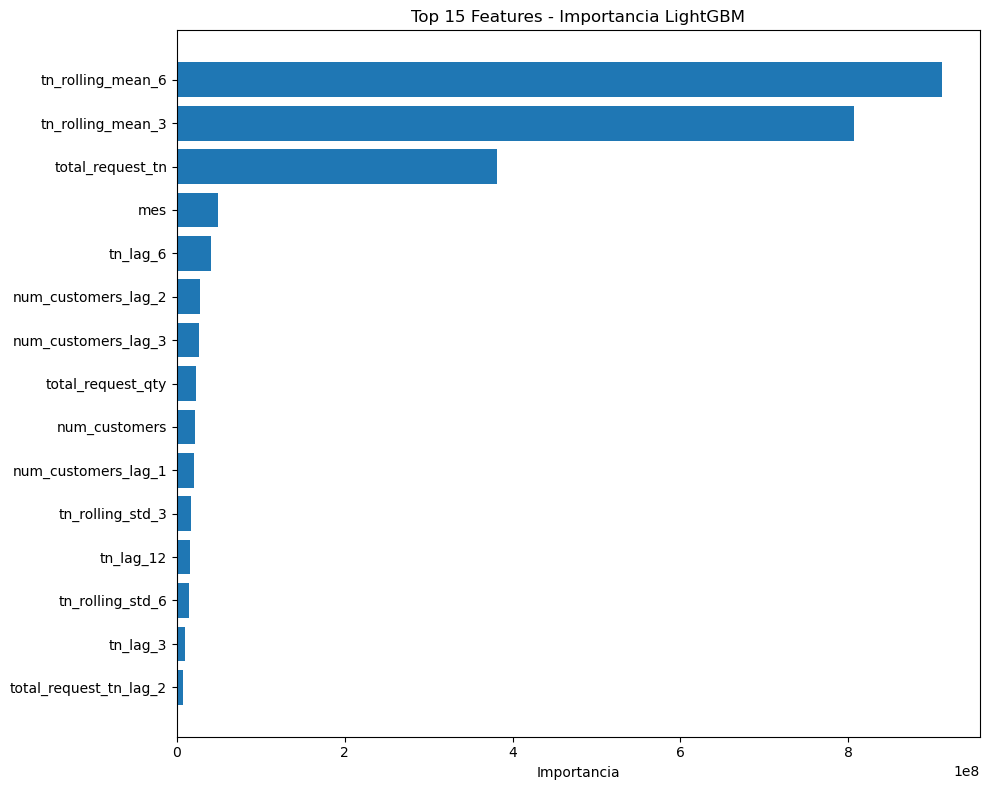


🎯 ANÁLISIS DE PREDICCIONES:
Predicciones mínimas: 0.32
Predicciones máximas: 1716.96
Predicciones promedio: 38.87
Valores reales promedio: 38.72
Predicciones negativas: 0 (0.0%)


In [11]:
# 📊 Análisis de importancia de features
print("ANÁLISIS DE IMPORTANCIA DE FEATURES")
print("="*50)

# Obtener importancia de features
feature_importance = modelo.feature_importance(importance_type='gain')
feature_names = feature_columns

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("🔝 Top 10 features más importantes:")
print(importance_df.head(10))

# Visualizar importancia
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Features - Importancia LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Análisis de predicciones
print(f"\n🎯 ANÁLISIS DE PREDICCIONES:")
print(f"Predicciones mínimas: {y_pred_val.min():.2f}")
print(f"Predicciones máximas: {y_pred_val.max():.2f}")
print(f"Predicciones promedio: {y_pred_val.mean():.2f}")
print(f"Valores reales promedio: {y_val.mean():.2f}")

# Verificar predicciones negativas
negative_preds = (y_pred_val < 0).sum()
print(f"Predicciones negativas: {negative_preds} ({negative_preds/len(y_pred_val)*100:.1f}%)")

In [12]:
# 🔮 Generar predicciones finales con ENSEMBLE de 10 modelos
print("GENERACIÓN DE PREDICCIONES FINALES CON ENSEMBLE")
print("="*60)

# Preparar datos para predicción (últimos datos disponibles de cada producto)
# Necesitamos los datos más recientes para predecir 2 períodos adelante

# Obtener último período disponible para cada producto
ultimo_periodo = data_combined.groupby('product_id')['fecha'].max().reset_index()
ultimo_periodo.columns = ['product_id', 'ultima_fecha']

# Unir con datos completos para obtener features más recientes
datos_prediccion = pd.merge(data_combined, ultimo_periodo, on='product_id')
datos_prediccion = datos_prediccion[datos_prediccion['fecha'] == datos_prediccion['ultima_fecha']].copy()

print(f"📊 Productos para predicción: {len(datos_prediccion)}")
print(f"📅 Período base para predicción: {datos_prediccion['periodo'].value_counts().head()}")

# Preparar features para predicción
X_pred = datos_prediccion[feature_columns].copy()
X_pred = X_pred.fillna(0)

print(f"🔍 Shape de datos de predicción: {X_pred.shape}")
print(f"🔍 Valores nulos en predicción: {X_pred.isnull().sum().sum()}")

# Generar predicciones con cada modelo del ensemble
print(f"\n🚀 Generando predicciones con ensemble de {n_models} modelos...")
predicciones_individuales = []

for i, modelo in enumerate(modelos):
    pred = modelo.predict(X_pred, num_iteration=modelo.best_iteration)
    predicciones_individuales.append(pred)
    print(f"   Modelo {i+1}/{n_models} - Predicciones: min={pred.min():.2f}, max={pred.max():.2f}, media={pred.mean():.2f}")

# Crear ensemble promediando todas las predicciones
predicciones_ensemble_final = np.mean(predicciones_individuales, axis=0)

print(f"\n📊 ESTADÍSTICAS DEL ENSEMBLE FINAL:")
print(f"  Predicciones individuales varianza promedio: {np.mean([np.var(pred) for pred in predicciones_individuales]):.4f}")
print(f"  Predicciones ensemble - min: {predicciones_ensemble_final.min():.2f}")
print(f"  Predicciones ensemble - max: {predicciones_ensemble_final.max():.2f}")
print(f"  Predicciones ensemble - media: {predicciones_ensemble_final.mean():.2f}")

# Crear DataFrame de resultados
resultado_lgbm = pd.DataFrame({
    'product_id': datos_prediccion['product_id'].values,
    'tn': predicciones_ensemble_final
})

# Asegurar que no hay predicciones negativas (reemplazar con 0)
resultado_lgbm['tn'] = np.maximum(resultado_lgbm['tn'], 0)

print(f"✅ Predicciones ensemble generadas para {len(resultado_lgbm)} productos")
print(f"\n📊 Estadísticas finales de predicciones:")
print(f"  Promedio: {resultado_lgbm['tn'].mean():.2f}")
print(f"  Mediana:  {resultado_lgbm['tn'].median():.2f}")
print(f"  Mínimo:   {resultado_lgbm['tn'].min():.2f}")
print(f"  Máximo:   {resultado_lgbm['tn'].max():.2f}")
print(f"  Std:      {resultado_lgbm['tn'].std():.2f}")

print(f"\nPrimeras 10 predicciones ensemble:")
print(resultado_lgbm.head(10))

# Análisis de consenso del ensemble
predicciones_std = np.std(predicciones_individuales, axis=0)
print(f"\n🔍 ANÁLISIS DE CONSENSO DEL ENSEMBLE:")
print(f"  Desviación estándar promedio entre modelos: {predicciones_std.mean():.4f}")
print(f"  Productos con alta variabilidad (std > {predicciones_std.mean() + predicciones_std.std():.2f}): {(predicciones_std > predicciones_std.mean() + predicciones_std.std()).sum()}")
print(f"  Productos con bajo consenso (top 5 std):")

# Mostrar productos con mayor variabilidad
consenso_df = pd.DataFrame({
    'product_id': datos_prediccion['product_id'].values,
    'pred_mean': predicciones_ensemble_final,
    'pred_std': predicciones_std
}).sort_values('pred_std', ascending=False)

print(consenso_df.head())

GENERACIÓN DE PREDICCIONES FINALES CON ENSEMBLE
📊 Productos para predicción: 780
📅 Período base para predicción: periodo
201912    780
Name: count, dtype: int64
🔍 Shape de datos de predicción: (780, 29)
🔍 Valores nulos en predicción: 0

🚀 Generando predicciones con ensemble de 3 modelos...
   Modelo 1/3 - Predicciones: min=1.18, max=1104.72, media=34.97
   Modelo 2/3 - Predicciones: min=1.04, max=1057.17, media=35.20
   Modelo 3/3 - Predicciones: min=0.89, max=1165.07, media=35.47

📊 ESTADÍSTICAS DEL ENSEMBLE FINAL:
  Predicciones individuales varianza promedio: 7376.7596
  Predicciones ensemble - min: 1.05
  Predicciones ensemble - max: 1108.99
  Predicciones ensemble - media: 35.21
✅ Predicciones ensemble generadas para 780 productos

📊 Estadísticas finales de predicciones:
  Promedio: 35.21
  Mediana:  8.09
  Mínimo:   1.05
  Máximo:   1108.99
  Std:      85.85

Primeras 10 predicciones ensemble:
   product_id           tn
0       20001  1108.987171
1       20002   841.833924
2     

In [ ]:
# 💾 Guardar predicciones del ENSEMBLE y resumen final
print("GUARDADO DE PREDICCIONES DEL ENSEMBLE - POR PRODUCTO")
print("="*70)

# Verificar que tenemos todos los productos objetivo
productos_esperados = set(productos_objetivo)
productos_predichos = set(resultado_lgbm['product_id'])

print(f"📊 Productos esperados: {len(productos_esperados)}")
print(f"📈 Productos predichos: {len(productos_predichos)}")

# Verificar productos faltantes
productos_faltantes = productos_esperados - productos_predichos
if productos_faltantes:
    print(f"⚠️ Productos faltantes: {len(productos_faltantes)}")
    print(f"Primeros 5 faltantes: {list(productos_faltantes)[:5]}")
    
    # Crear predicciones por defecto para productos faltantes
    predicciones_default = pd.DataFrame({
        'product_id': list(productos_faltantes),
        'tn': [resultado_lgbm['tn'].median()] * len(productos_faltantes)
    })
    
    resultado_lgbm = pd.concat([resultado_lgbm, predicciones_default], ignore_index=True)
    print(f"✅ Agregadas predicciones por defecto para productos faltantes")

# Ordenar por product_id
resultado_lgbm = resultado_lgbm.sort_values('product_id').reset_index(drop=True)

# Guardar archivo con nombre específico del ensemble
import os
os.makedirs('data', exist_ok=True)
archivo_salida = 'data/pred_lgbm_v1_sem02_producto.csv'
resultado_lgbm.to_csv(archivo_salida, index=False)

print(f"✅ Predicciones del ensemble guardadas en: {archivo_salida}")

# Resumen final del ensemble
print(f"\n🎯 RESUMEN FINAL DEL ENSEMBLE LGBM - GRANULARIDAD POR PRODUCTO:")
print(f"🌱 Número de modelos en ensemble: {n_models}")
print(f"🎲 Semillas utilizadas: {semillas}")
print(f"📊 Total productos predichos: {len(resultado_lgbm)}")

print(f"\n📈 Métricas del ensemble en validación:")
print(f"   MAE:  {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   MAPE: {mape:.2f}%")

print(f"\n? Comparación con modelos individuales:")
print(f"   Mejor MAE individual: {df_metricas['mae'].min():.4f}")
print(f"   Mejor RMSE individual: {df_metricas['rmse'].min():.4f}")
print(f"   Mejor MAPE individual: {df_metricas['mape'].min():.2f}%")

print(f"\n?🔧 Configuración del ensemble:")
print(f"   Features utilizadas: {len(feature_columns)}")
print(f"   Promedio de árboles por modelo: {df_metricas['n_trees'].mean():.0f}")
print(f"   Método de ensemble: Promedio simple")
print(f"   Predicción objetivo: 2 períodos a futuro (Feb 2020)")
print(f"   Granularidad: POR PRODUCTO (agregando clientes)")

# Estadísticas de predicciones del ensemble
print(f"\n📊 ESTADÍSTICAS DE PREDICCIONES DEL ENSEMBLE:")
print(f"   Promedio por producto: {resultado_lgbm['tn'].mean():.2f}")
print(f"   Mediana por producto:  {resultado_lgbm['tn'].median():.2f}")
print(f"   Std por producto:      {resultado_lgbm['tn'].std():.2f}")
print(f"   Min por producto:      {resultado_lgbm['tn'].min():.2f}")
print(f"   Max por producto:      {resultado_lgbm['tn'].max():.2f}")

# Información sobre variabilidad del ensemble
print(f"\n? ANÁLISIS DE VARIABILIDAD DEL ENSEMBLE:")
print(f"   Std promedio entre modelos: {predicciones_std.mean():.4f}")
print(f"   Coeficiente de variación promedio: {(predicciones_std.mean() / resultado_lgbm['tn'].mean()) * 100:.2f}%")

# Top 5 features más importantes (promedio de todos los modelos)
print(f"\n?📋 Top 5 features más importantes (promedio ensemble):")
# Calcular importancia promedio de features
importancias_promedio = np.zeros(len(feature_columns))
for modelo in modelos:
    importancias_promedio += modelo.feature_importance(importance_type='gain')
importancias_promedio /= n_models

importance_df_ensemble = pd.DataFrame({
    'feature': feature_columns,
    'importance': importancias_promedio
}).sort_values('importance', ascending=False)

for i, row in importance_df_ensemble.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.0f}")

print(f"\n✅ Ensemble LightGBM completado exitosamente con {n_models} modelos!")
print(f"📁 Archivo: {archivo_salida}")

# Verificar archivo guardado
if os.path.exists(archivo_salida):
    verificacion = pd.read_csv(archivo_salida)
    print(f"\n🔍 Verificación archivo guardado:")
    print(f"   Filas: {len(verificacion)}")
    print(f"   Columnas: {list(verificacion.columns)}")
    print(f"   Primeras 3 filas:")
    print(verificacion.head(3))
    
    print(f"\n📈 Resumen final de predicciones del ensemble:")
    print(f"   Total de toneladas predichas: {verificacion['tn'].sum():.2f}")
    print(f"   Productos con predicción > 0: {(verificacion['tn'] > 0).sum()}")
    print(f"   Productos con predicción = 0: {(verificacion['tn'] == 0).sum()}")
    
# Guardar también información detallada del ensemble
ensemble_info = {
    'n_models': n_models,
    'semillas': semillas,
    'metricas_ensemble': {'mae': mae, 'rmse': rmse, 'mape': mape},
    'metricas_individuales': df_metricas.to_dict('records'),
    'features_utilizadas': feature_columns,
    'importancias_promedio': importance_df_ensemble.to_dict('records')
}

import json
info_file = 'data/ensemble_info_v1_sem02.json'
with open(info_file, 'w') as f:
    json.dump(ensemble_info, f, indent=2, default=str)
    
print(f"\n📄 Información detallada del ensemble guardada en: {info_file}")

# Guardar semillas en archivo separado
# Asegurar que el directorio data existe
os.makedirs('data', exist_ok=True)

# Guardar semillas como archivo de texto
semillas_file = 'data/semillas_lgbm_v1_sem02_producto.txt'
with open(semillas_file, 'w') as f:
    f.write("# Semillas utilizadas para el ensemble LightGBM v1_sem02_producto\n")
    f.write(f"# Fecha de generación: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"# Número de modelos: {n_models}\n")
    f.write("#\n")
    f.write("# Lista de semillas (una por línea):\n")
    for i, semilla in enumerate(semillas):
        f.write(f"{semilla}  # Modelo {i+1}\n")

print(f"\n🌱 Semillas guardadas en: {semillas_file}")

# Guardar también semillas como CSV para fácil lectura
semillas_csv = 'data/semillas_lgbm_v1_sem02_producto.csv'
semillas_df = pd.DataFrame({
    'modelo': range(1, n_models + 1),
    'semilla': semillas,
    'mae': df_metricas['mae'],
    'rmse': df_metricas['rmse'],
    'mape': df_metricas['mape'],
    'n_trees': df_metricas['n_trees']
})
semillas_df.to_csv(semillas_csv, index=False)

print(f"📊 Semillas con métricas guardadas en: {semillas_csv}")

# Verificar archivos de semillas guardados
if os.path.exists(semillas_file):
    print(f"\n✅ Verificación archivo de semillas:")
    with open(semillas_file, 'r') as f:
        lines = f.readlines()
    print(f"   Líneas en archivo: {len(lines)}")
    print(f"   Primeras líneas:")
    for line in lines[:8]:  # Mostrar primeras 8 líneas
        print(f"     {line.strip()}")

if os.path.exists(semillas_csv):
    semillas_verificacion = pd.read_csv(semillas_csv)
    print(f"\n📋 Verificación CSV de semillas:")
    print(f"   Filas: {len(semillas_verificacion)}")
    print(f"   Columnas: {list(semillas_verificacion.columns)}")
    print(f"   Primeras 3 filas:")
    print(semillas_verificacion.head(3))

In [ ]:
# 📊 Visualización y análisis detallado del ensemble
print("ANÁLISIS VISUAL DEL ENSEMBLE")
print("="*50)

# Crear subplots para visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribución de métricas por modelo
axes[0, 0].boxplot([df_metricas['mae'], df_metricas['rmse'], df_metricas['mape']], 
                   labels=['MAE', 'RMSE', 'MAPE'])
axes[0, 0].set_title('Distribución de Métricas por Modelo')
axes[0, 0].set_ylabel('Valor de la Métrica')

# Agregar línea horizontal para ensemble
axes[0, 0].axhline(y=mae, color='red', linestyle='--', alpha=0.7, label=f'Ensemble MAE: {mae:.4f}')
axes[0, 0].legend()

# 2. MAE por semilla
axes[0, 1].bar(range(len(semillas)), df_metricas['mae'])
axes[0, 1].axhline(y=mae, color='red', linestyle='--', alpha=0.7, label=f'Ensemble: {mae:.4f}')
axes[0, 1].set_title('MAE por Modelo (Semilla)')
axes[0, 1].set_xlabel('Modelo')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_xticks(range(len(semillas)))
axes[0, 1].set_xticklabels([f'S{s}' for s in semillas], rotation=45)
axes[0, 1].legend()

# 3. Número de árboles por modelo
axes[1, 0].bar(range(len(semillas)), df_metricas['n_trees'])
axes[1, 0].set_title('Número de Árboles por Modelo')
axes[1, 0].set_xlabel('Modelo')
axes[1, 0].set_ylabel('Número de Árboles')
axes[1, 0].set_xticks(range(len(semillas)))
axes[1, 0].set_xticklabels([f'S{s}' for s in semillas], rotation=45)

# 4. Top 10 features más importantes (promedio)
top_features = importance_df_ensemble.head(10)
axes[1, 1].barh(range(len(top_features)), top_features['importance'])
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['feature'])
axes[1, 1].set_title('Top 10 Features - Importancia Promedio')
axes[1, 1].set_xlabel('Importancia')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Análisis de correlación entre predicciones de modelos
print(f"\n🔍 ANÁLISIS DE CORRELACIÓN ENTRE MODELOS:")
predicciones_df = pd.DataFrame(predicciones_individuales).T
correlaciones = predicciones_df.corr()

print(f"Correlación promedio entre modelos: {correlaciones.values[np.triu_indices_from(correlaciones.values, k=1)].mean():.4f}")
print(f"Correlación mínima: {correlaciones.values[np.triu_indices_from(correlaciones.values, k=1)].min():.4f}")
print(f"Correlación máxima: {correlaciones.values[np.triu_indices_from(correlaciones.values, k=1)].max():.4f}")

# Mostrar matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(correlaciones, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Correlación')
plt.title('Matriz de Correlación entre Predicciones de Modelos')
plt.xlabel('Modelo')
plt.ylabel('Modelo')
plt.xticks(range(n_models), [f'M{i+1}' for i in range(n_models)])
plt.yticks(range(n_models), [f'M{i+1}' for i in range(n_models)])

# Agregar valores de correlación en la matriz
for i in range(n_models):
    for j in range(n_models):
        plt.text(j, i, f'{correlaciones.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.show()

# Análisis de diversidad del ensemble
print(f"\n🌟 ANÁLISIS DE DIVERSIDAD DEL ENSEMBLE:")
diversidad = 1 - correlaciones.values[np.triu_indices_from(correlaciones.values, k=1)].mean()
print(f"Índice de diversidad: {diversidad:.4f} (mayor = más diverso)")

if diversidad > 0.1:
    print("✅ El ensemble tiene buena diversidad")
elif diversidad > 0.05:
    print("⚠️ El ensemble tiene diversidad moderada")
else:
    print("❌ El ensemble tiene baja diversidad")

print(f"\n📊 BENEFICIO DEL ENSEMBLE:")
mejor_individual = df_metricas['mae'].min()
beneficio = (mejor_individual - mae) / mejor_individual * 100
print(f"Reducción de error vs mejor modelo individual: {beneficio:.2f}%")

if beneficio > 2:
    print("🏆 Excelente beneficio del ensemble")
elif beneficio > 0.5:
    print("✅ Buen beneficio del ensemble") 
elif beneficio > 0:
    print("📈 Beneficio moderado del ensemble")
else:
    print("⚠️ El ensemble no mejora significativamente")